Kmeans clustering for heart failure data set

In [14]:
#Importing the Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Reading the CSV file

In [15]:
dataset = pd.read_csv("C:/abcd/Dataset/pjct_demo/heart_failure_clinical_records_dataset.csv")
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [16]:
A = dataset.describe()
print(A)

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [17]:
x = dataset.iloc[:,[0,4]].values
x

array([[75.   , 20.   ],
       [55.   , 38.   ],
       [65.   , 20.   ],
       [50.   , 20.   ],
       [65.   , 20.   ],
       [90.   , 40.   ],
       [75.   , 15.   ],
       [60.   , 60.   ],
       [65.   , 65.   ],
       [80.   , 35.   ],
       [75.   , 38.   ],
       [62.   , 25.   ],
       [45.   , 30.   ],
       [50.   , 38.   ],
       [49.   , 30.   ],
       [82.   , 50.   ],
       [87.   , 38.   ],
       [45.   , 14.   ],
       [70.   , 25.   ],
       [48.   , 55.   ],
       [65.   , 25.   ],
       [65.   , 30.   ],
       [68.   , 35.   ],
       [53.   , 60.   ],
       [75.   , 30.   ],
       [80.   , 38.   ],
       [95.   , 40.   ],
       [70.   , 45.   ],
       [58.   , 38.   ],
       [82.   , 30.   ],
       [94.   , 38.   ],
       [85.   , 45.   ],
       [50.   , 35.   ],
       [50.   , 30.   ],
       [65.   , 50.   ],
       [69.   , 35.   ],
       [90.   , 50.   ],
       [82.   , 50.   ],
       [60.   , 30.   ],
       [60.   , 38.   ],


In [18]:

y = dataset.iloc[:,[0,4]].value_counts()
y


age   ejection_fraction
50.0  30                   7
70.0  35                   6
65.0  25                   6
60.0  25                   6
55.0  35                   6
                          ..
69.0  40                   1
70.0  17                   1
      20                   1
      30                   1
40.0  30                   1
Length: 174, dtype: int64

In [19]:
a = dataset.iloc[:,0]     #Age column
print("minimum age:",min(a))
print("maximum age:",max(a))

minimum age: 40.0
maximum age: 95.0


In [20]:

b = dataset.iloc[:,4]                     #Ejection Fraction
print("minimum ejection fraction:",min(b))
print("maximum ejection fraction:",max(b))

minimum ejection fraction: 14
maximum ejection fraction: 80


(array([15.,  3., 22.,  3., 31., 19., 19.,  3., 14., 39., 16., 28.,  7.,
        28.,  7., 15.,  2.,  3.,  8.,  3.,  7.,  1.,  3.,  0.,  3.]),
 array([40. , 42.2, 44.4, 46.6, 48.8, 51. , 53.2, 55.4, 57.6, 59.8, 62. ,
        64.2, 66.4, 68.6, 70.8, 73. , 75.2, 77.4, 79.6, 81.8, 84. , 86.2,
        88.4, 90.6, 92.8, 95. ]),
 <BarContainer object of 25 artists>)

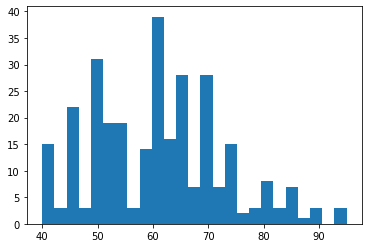

In [26]:
plt.hist(a,bins = 25)
plt.show()

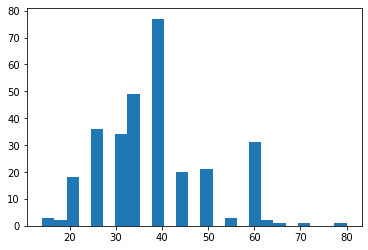

In [27]:
plt.hist(b,bins = 25)
plt.show()

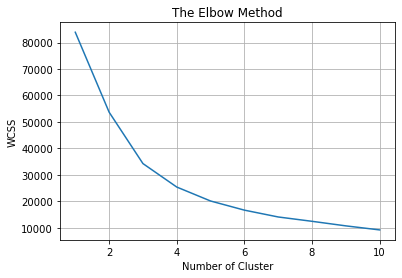

In [21]:
#Using the Elbow method to find the optional number of the cluster

from sklearn.cluster import KMeans
wcss_list=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_list)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [22]:
#Fitting the K-Means clustering on the data set
kmeans = KMeans(n_clusters =3,init = "k-means++",random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans


array([2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1,
       1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0,
       2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1,
       2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2,
       0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0,
       2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0])

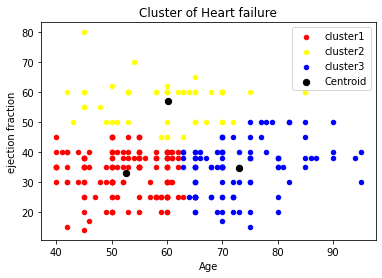

In [23]:
#Visualizaion of Cluster

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=20,c="red",label="cluster1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=20,c="yellow",label="cluster2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=20,c="blue",label="cluster3")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c="black",label="Centroid")

plt.title("Cluster of Heart failure")
plt.xlabel("Age")
plt.ylabel("ejection fraction")
plt.legend()
plt.show()